<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Unsupervised Learning - DBScan - Iris
</b></font> </br></p> 

---


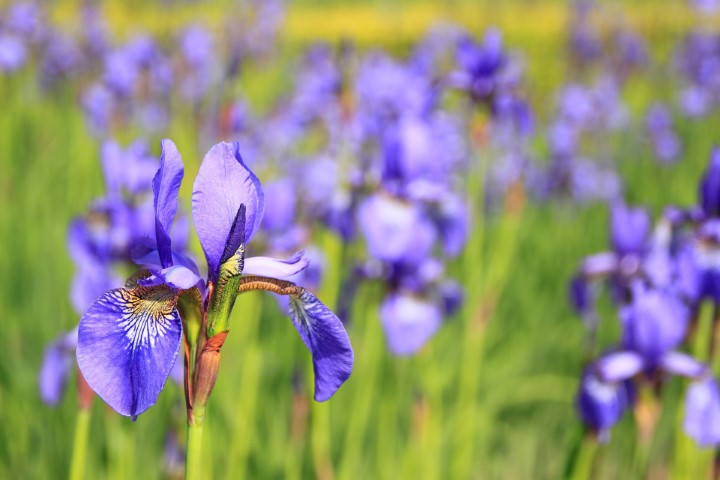

Bild von <a href="https://pixabay.com/de/users/fotomanie-19282/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=76336">Manfred Nimbs</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=76336">Pixabay</a>

# **1 <font color='orange'>|</font>  Understand**

---


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Der Irisblüten-Datensatz Es wird manchmal Andersons Iris-Datensatz genannt, weil Edgar Anderson die Daten gesammelt hat, um die morphologische Variation von Irisblüten von drei verwandten Arten zu quantifizieren. 

Der Datensatz besteht aus jeweils 50 Proben von drei Irisarten (setosa, virginica und versicolor). Von jeder Probe wurden vier Merkmale gemessen: die Länge und die Breite der Kelch- und Blütenblätter in Zentimetern. Basierend auf der Kombination dieser vier Merkmale entwickelte Fisher ein lineares Diskriminanzmodell, um die Arten voneinander zu unterscheiden.


[DataSet](https://www.openml.org/search?type=data&status=active&id=61)

[Info](https://www.kaggle.com/datasets/vikrishnan/iris-dataset)



<p><font color='black' size="5">
Daten laden 
</font></p>



In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', data_id=61)
data = df.data.copy()
target = df.target.copy()
print (df.data.shape, df.target.shape, df.feature_names)

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>


In [ ]:
df.frame

In [ ]:
df.frame.dtypes

In [ ]:
df.frame.describe().T

In [ ]:
df.frame.corr()

In [ ]:
df.frame['class'].value_counts()

# **2 <font color='orange'>|</font> Prepare**

---

In [ ]:
target.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['setosa', 'versicolor', 'virginica'], inplace=True)

# **3 <font color='orange'>|</font> Modeling**
---


<p><font color='black' size="5">
Modellauswahl & Training
</font></p>

<p><font size="3">


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN()
model.fit(data)

# **4 <font color='orange'>|</font> Evaluate**
---


Ergebnis der Clusterung: 0, 1 echte Cluster, -1 Noise/Rauschen

In [ ]:
model.labels_

In [ ]:
_ = model.fit_predict(data)

<p><font color='black' size="5">
Silhouettenkoeffizient
</font></p>

In [ ]:
 from sklearn.metrics import silhouette_score
 s_score = silhouette_score(data, model.labels_, metric='euclidean')
 print(f'Silhouettenkoeffizient: {s_score:0.2f}')

<p><font color='black' size="5">
Vergleich Klassifizierung vs. Clusterbildung - Sepal
</font></p>

In [ ]:
import plotly.express as px
import numpy as np

df.frame['target_pred'] = np.array(model.labels_)
df.frame['target_pred'].replace([-1, 0, 1, 2], ['non', 'setosa', 'versicolor', 'virginica'], inplace=True)

plot_01 = px.scatter(df.frame, x = 'sepallength', y = 'sepalwidth', color='class', symbol = 'class')
plot_02 = px.scatter(df.frame, x = 'sepallength', y = 'sepalwidth',  color='target_pred', symbol = 'target_pred')

plot_01.update_layout(height=400, width=600, title_text="Classification")
plot_02.update_layout(height=400, width=600, title_text="Clustering")

plot_01.show()
plot_02.show()

<p><font color='black' size="5">
Vergleich Klassifizierung vs. Clusterbildung - Petal
</font></p>

In [ ]:
import plotly.express as px
import numpy as np

df.frame['target_pred'] = np.array(model.labels_)
df.frame['target_pred'].replace([-1, 0, 1, 2], ['non', 'setosa', 'versicolor', 'virginica'], inplace=True)

plot_01 = px.scatter(df.frame, x = 'petallength', y = 'petalwidth', color='class', symbol = 'class')
plot_02 = px.scatter(df.frame, x = 'petallength', y = 'petalwidth',  color='target_pred', symbol = 'target_pred')

plot_01.update_layout(height=400, width=600, title_text="Classification")
plot_02.update_layout(height=400, width=600, title_text="Clustering")

plot_01.show()
plot_02.show()


<p><font color='black' size="5">
Metrik
</font></p>

In [ ]:
from sklearn import metrics
print ('Metrics:')
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target, model.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(target, model.labels_))

# **5 <font color='orange'>|</font> Deploy**
---